In [2]:
%pip install seaborn
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv(r"C:\Users\ayush\heart_disease_project\heart.csv")

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


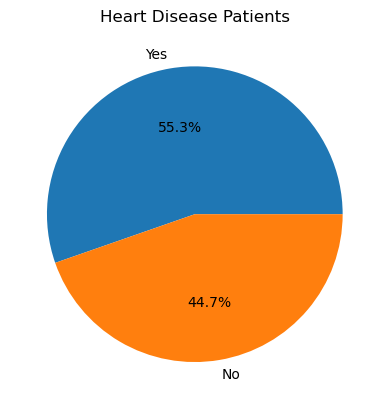

In [7]:
labels=['Yes','No']
size=df.HeartDisease.value_counts()
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Heart Disease Patients')
plt.show()

In [8]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

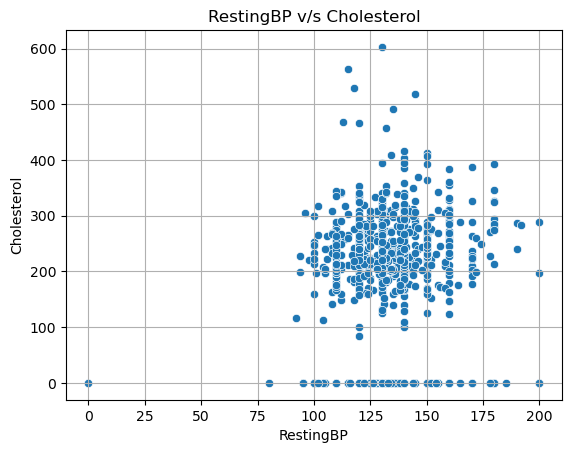

In [9]:
sns.scatterplot(x='RestingBP',y='Cholesterol', data=df)
plt.title('RestingBP v/s Cholesterol')
plt.xlabel('RestingBP')
plt.ylabel('Cholesterol')
plt.grid()
plt.show()

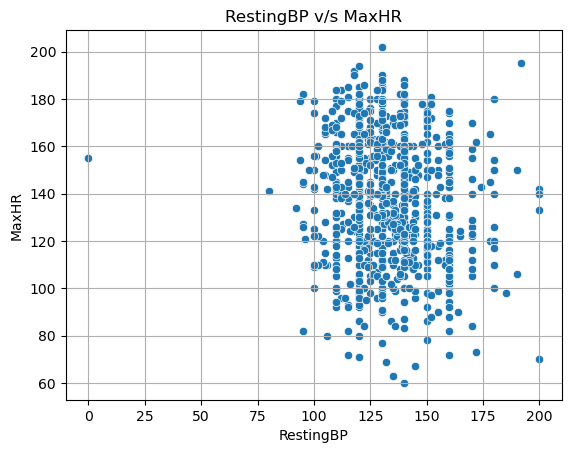

In [10]:
sns.scatterplot(x='RestingBP',y='MaxHR', data=df)
plt.title('RestingBP v/s MaxHR')
plt.xlabel('RestingBP')
plt.ylabel('MaxHR')
plt.grid()
plt.show()

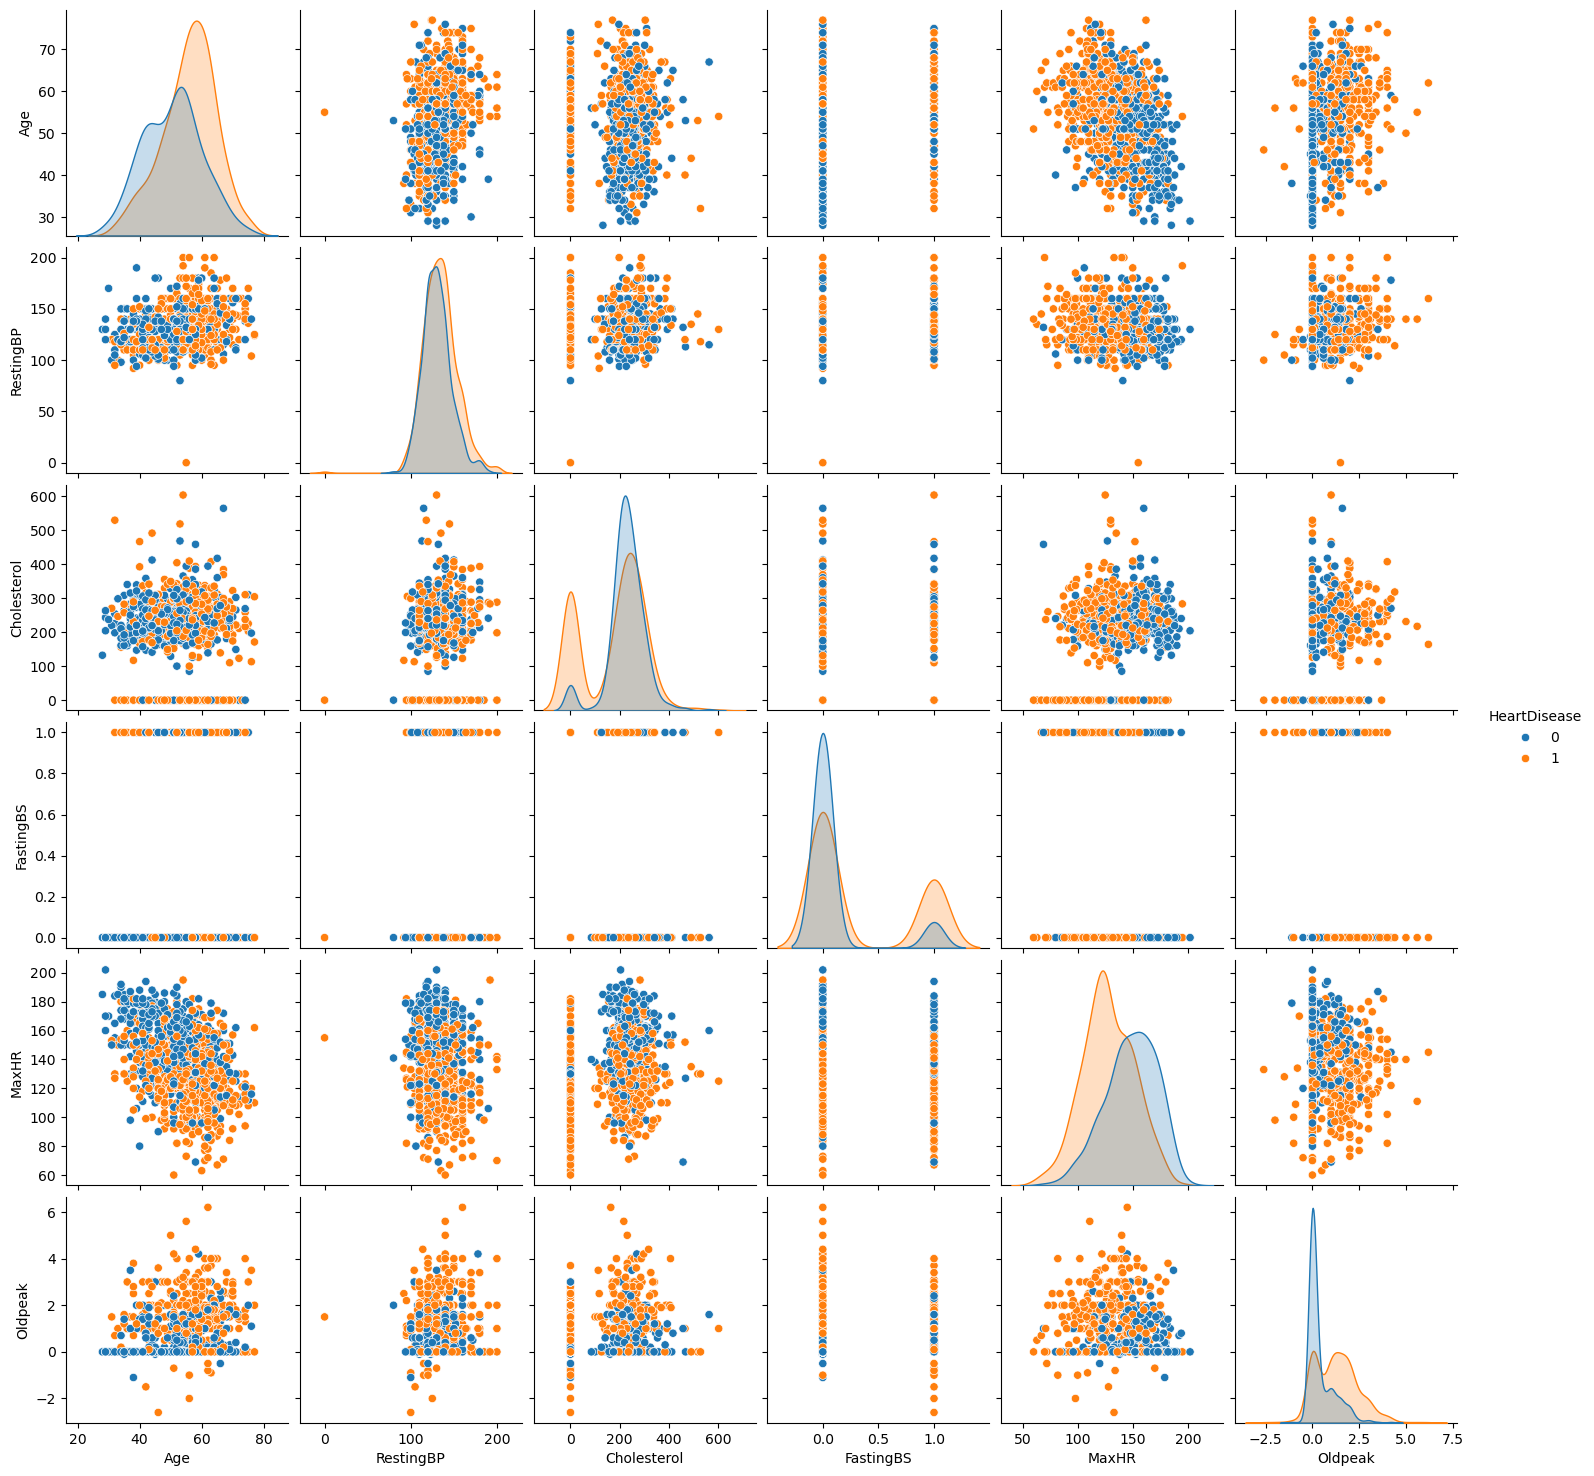

In [11]:
pair=sns.pairplot(df, hue='HeartDisease')
print(pair)

In [12]:
df.drop('ST_Slope',axis=1,inplace=True)

In [13]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,1


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
cols=['Sex','ChestPainType','RestingECG','ExerciseAngina']
l = LabelEncoder()

for col in cols:
    df[col]=l.fit_transform(df[col])

In [16]:
x=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [17]:
print(x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  
0      172   

In [18]:
print(y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [21]:
print(x.shape,x_train.shape,x_test.shape)

(918, 10) (734, 10) (184, 10)


In [22]:
print(y.shape,y_train.shape,y_test.shape)

(918,) (734,) (184,)


### KNN Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.model_selection import GridSearchCV

In [24]:
k=11
knn_model=KNeighborsClassifier(n_neighbors=k)

In [25]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [26]:
y_predict=knn_model.predict(x_test)
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.74


In [27]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        89
           1       0.72      0.80      0.76        95

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.74      0.74      0.74       184



In [28]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[60 29]
 [19 76]]


In [29]:
pg={"n_neighbors":np.arange(1,5)}
gsm=GridSearchCV(knn_model,param_grid=pg)
gsm.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [30]:
y_predict=gsm.predict(x_test)
conf_matrix=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(accuracy)

0.6739130434782609


In [31]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        89
           1       0.66      0.75      0.70        95

    accuracy                           0.67       184
   macro avg       0.68      0.67      0.67       184
weighted avg       0.68      0.67      0.67       184



In [32]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[53 36]
 [24 71]]


### Naive Bayes

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

In [34]:
Nmodel=GaussianNB()
Nmodel.fit(x_train,y_train)

GaussianNB()

In [35]:
y_predict=Nmodel.predict(x_test)

In [36]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.84


In [37]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        89
           1       0.84      0.85      0.84        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [38]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[73 16]
 [14 81]]


In [39]:
par_G={'var_smoothing':[1e-9,1e-8,1e-7,1e-6,1e-5]}
gsm=GridSearchCV(estimator=Nmodel,param_grid=par_G)
gsm.fit(x_train,y_train)                

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [40]:
y_predict=gsm.predict(x_test)

In [41]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.86


In [42]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        89
           1       0.86      0.86      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [43]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[76 13]
 [13 82]]


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg=LogisticRegression()

In [45]:
lg.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_predict=lg.predict(x_test)

In [47]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.86


In [48]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        89
           1       0.86      0.87      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [49]:
lg.coef_

array([[ 0.0153998 ,  1.25149659, -0.5281504 ,  0.00338435, -0.00369629,
         1.07033237, -0.27693012, -0.01413636,  1.42064094,  0.66401974]])

In [50]:
np.exp(lg.coef_[0])

array([1.01551898, 3.49557047, 0.58969466, 1.00339008, 0.99631054,
       2.91634863, 0.75810747, 0.98596309, 4.13977295, 1.94258535])

In [51]:
pg = {"max_iter":[100,200]}
gsm3=GridSearchCV(lg, pg)
gsm3.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200]})

In [52]:
y_predict=gsm3.predict(x_test)

In [53]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.86


In [54]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        89
           1       0.86      0.87      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [55]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[76 13]
 [12 83]]


### DECISION TREE CLASSIFIER

In [56]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [57]:
dt=DecisionTreeClassifier(random_state=0)

In [58]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [59]:
y_predict=dt.predict(x_test)

In [60]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.76


In [61]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.75      0.76      0.76        89
           1       0.77      0.76      0.77        95

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.76      0.76      0.76       184



In [62]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[68 21]
 [23 72]]


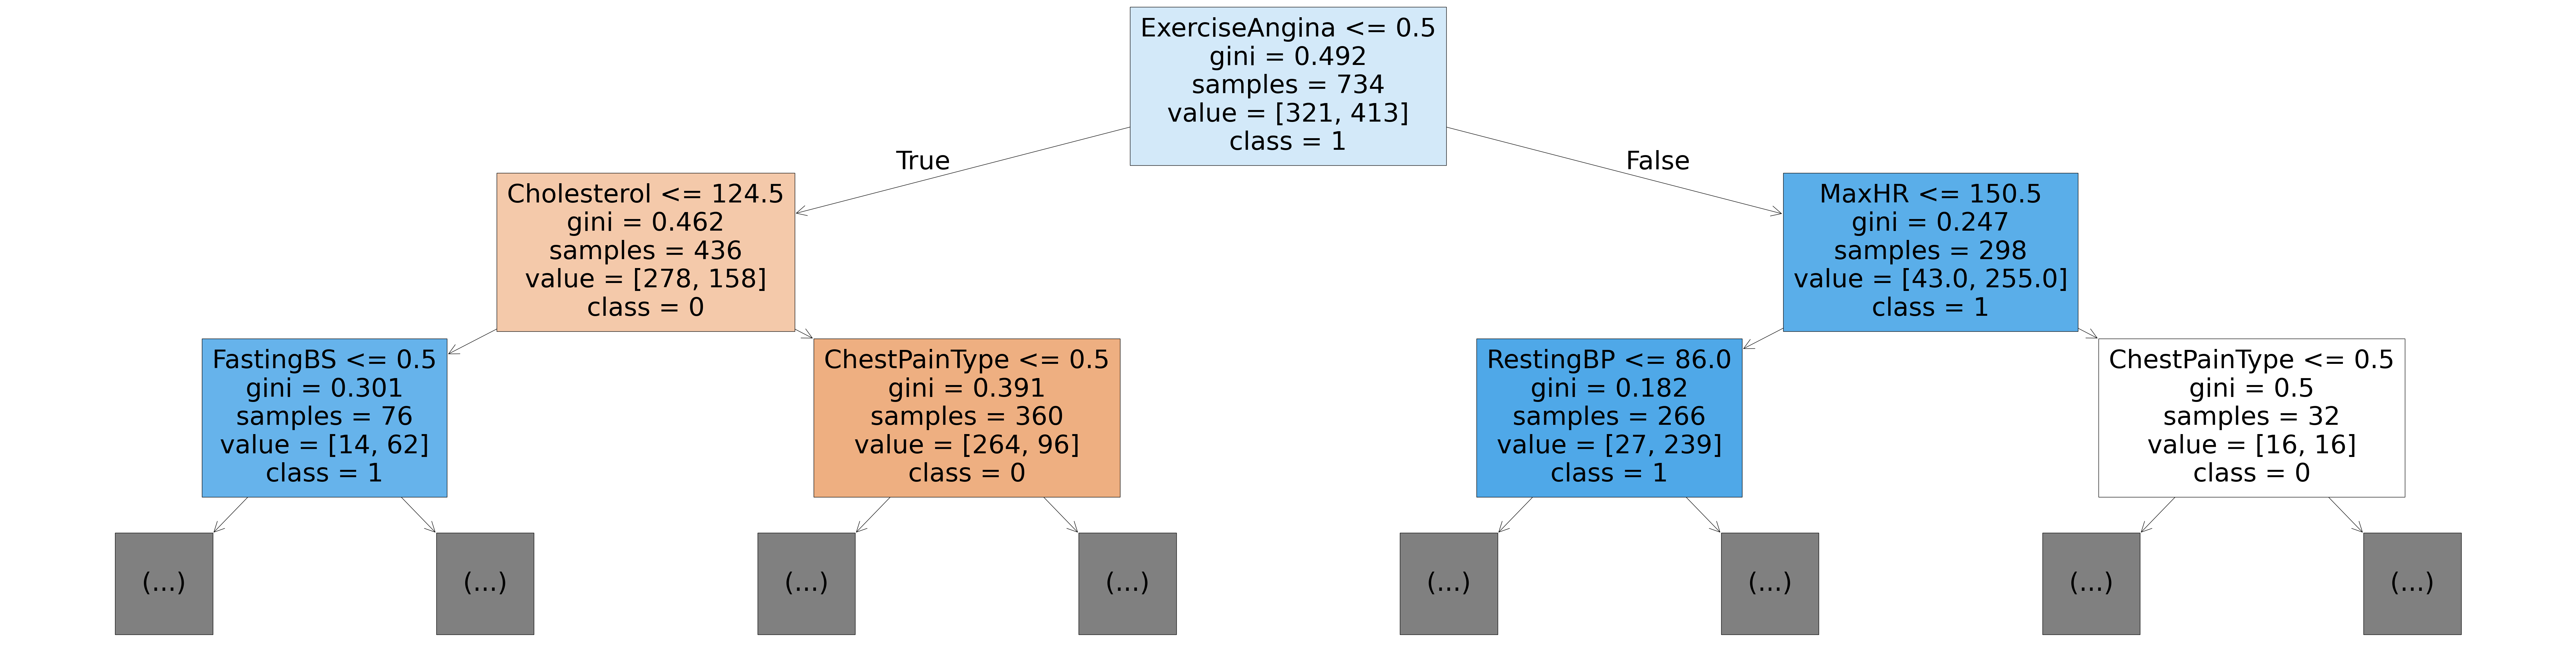

In [63]:
cn=[str(cls) for cls in dt.classes_]
plt.figure(figsize=(100,26))
plot_tree(dt,filled=True,feature_names=x_train.columns,class_names=cn,max_depth=2)
plt.show()

In [64]:
pg={'criterion':['gini','entropy'],'max_depth':[None, 10, 20, 30, 40, 50], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]}
gsm3=GridSearchCV(estimator=dt, param_grid=pg)
gsm3.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [65]:
y_predict=gsm3.predict(x_test)

In [66]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.79


In [67]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        89
           1       0.79      0.81      0.80        95

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [68]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[69 20]
 [18 77]]


### RANDOM FOREST CLASSIFIER

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [70]:
rf = RandomForestClassifier(n_estimators=15)

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=15)

In [72]:
y_predict=rf.predict(x_test)

In [73]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.86


In [74]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        89
           1       0.85      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [75]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[74 15]
 [10 85]]


In [76]:
pg={'criterion':['gini','entropy'],'max_depth':[None, 10, 20, 30, 40, 50], 'min_samples_split':[2, 5, 10], 'min_samples_leaf':[1, 2, 4]}
gsm3=GridSearchCV(estimator=rf, param_grid=pg)
gsm3.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=15),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [77]:
y_predict=gsm3.predict(x_test)

In [78]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.85


In [79]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        89
           1       0.84      0.87      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [80]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[73 16]
 [12 83]]


### SUPPORT VECTOR MACHINE

In [81]:
from sklearn.svm import SVC
classifier=SVC()


In [82]:
classifier.fit(x_train,y_train)

SVC()

In [83]:
y_predict=classifier.predict(x_test)

In [84]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.73


In [85]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        89
           1       0.73      0.76      0.75        95

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



In [86]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[63 26]
 [23 72]]


In [87]:
pg5={'C':[0.1,1,5],'kernel':['linear']}
gsm5=GridSearchCV(estimator=classifier,param_grid=pg5,cv=5)
gsm5.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5], 'kernel': ['linear']})

In [88]:
y_predict=gsm5.predict(x_test)

In [89]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.84


In [90]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        89
           1       0.84      0.85      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [91]:
conf_matrix=confusion_matrix(y_test,y_predict)
print(conf_matrix)

[[74 15]
 [14 81]]


### Bagging Classifier

In [92]:
from sklearn.ensemble import BaggingClassifier

In [93]:
BE=DecisionTreeClassifier(random_state=0)

In [94]:
bcm = BaggingClassifier(estimator=BE, n_estimators=10, random_state=0)

In [95]:
bcm.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0),
                  random_state=0)

In [96]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.84


In [97]:
rf_m=confusion_matrix(y_predict,y_test)
print(rf_m)

[[74 14]
 [15 81]]


In [98]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        89
           1       0.84      0.85      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gbm=GradientBoostingClassifier(n_estimators=10,learning_rate=0.1,random_state=40)


In [101]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=40)

In [102]:
y6_predict=gbm.predict(x_test)

In [103]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.84


In [104]:
rf_m=confusion_matrix(y_predict,y_test)
print(rf_m)

[[74 14]
 [15 81]]


In [105]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        89
           1       0.84      0.85      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



### Grid Search CV for Gradient Boosting Machine(GBM)

In [106]:
from sklearn.ensemble import VotingClassifier

In [107]:
pg={'n_estimators':[50,100,200],'learning_rate':[0.1,0.05,0.01],'max_depth':[3,4,5,]}
gsm4=GridSearchCV(estimator=gbm,param_grid=pg,cv=5)
gsm4.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(n_estimators=10,
                                                  random_state=40),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]})

In [108]:
y_predic=gsm4.predict(x_test)

In [109]:
c_report=classification_report(y_test,y_predic)
print(c_report)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        89
           1       0.86      0.85      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [110]:
f1=LogisticRegression(max_iter=1000,random_state=0)
f2=DecisionTreeClassifier(random_state=0)
f3=SVC(kernel='linear',random_state=0)
f4=GradientBoostingClassifier(random_state=0)

In [111]:
vcm=VotingClassifier(estimators=[('lr',f1),('dt',f2),('svm',f3),('gbm',f4)],voting='hard')

In [112]:
vcm.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=0)),
                             ('dt', DecisionTreeClassifier(random_state=0)),
                             ('svm', SVC(kernel='linear', random_state=0)),
                             ('gbm',
                              GradientBoostingClassifier(random_state=0))])

In [113]:
y_predict=vcm.predict(x_test)

In [114]:
accuracy=accuracy_score(y_test,y_predict)
print(f'accuracy:{accuracy:.2f}')

accuracy:0.86


In [115]:
rf_m=confusion_matrix(y_predict,y_test)
print(rf_m)

[[78 14]
 [11 81]]


In [116]:
c_report=classification_report(y_test,y_predict)
print(c_report)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        89
           1       0.88      0.85      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [117]:
data={
'Algorithms' : ['KNeighbors','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Bagging','Gradient Boosting Machine','Voting Classifier'],
'Accuracy (%)': [74,84,86,76,82,73,84,84,86],
'Precision (%)': [74,84,86,76,82,73,84,84,86],
'Recall (%)': [74,84,86,76,81,73,84,84,86],
'F1 Score (%)': [74,84,86,76,81,73,84,84,86],}
data=pd.DataFrame(data)
print(data)


                  Algorithms  Accuracy (%)  Precision (%)  Recall (%)  \
0                 KNeighbors            74             74          74   
1                Naive Bayes            84             84          84   
2        Logistic Regression            86             86          86   
3              Decision Tree            76             76          76   
4              Random Forest            82             82          81   
5     Support Vector Machine            73             73          73   
6                    Bagging            84             84          84   
7  Gradient Boosting Machine            84             84          84   
8          Voting Classifier            86             86          86   

   F1 Score (%)  
0            74  
1            84  
2            86  
3            76  
4            81  
5            73  
6            84  
7            84  
8            86  


In [118]:
data1=data.melt(id_vars='Algorithms',var_name='Metric',value_name='Score')

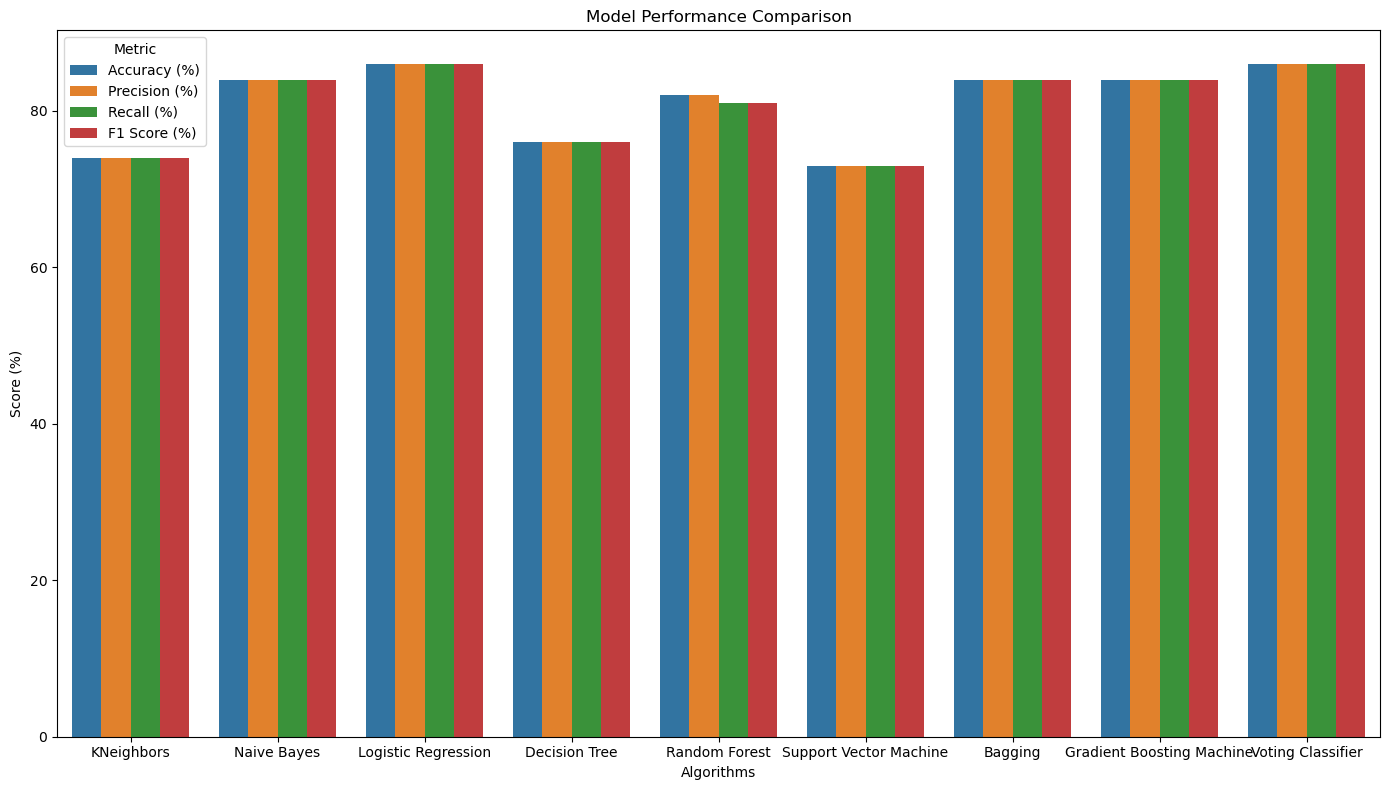

In [119]:
plt.figure(figsize=(14,8))
sns.barplot(data=data1,x='Algorithms',y='Score',hue='Metric')
plt.title('Model Performance Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Score (%)')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [120]:
fea_imp=dt.feature_importances_
df=pd.DataFrame({'feature':x.columns,'Importance':fea_imp*100})
df=df.sort_values(by='Importance',ascending=False)
df

,feature,Importance
4,Cholesterol,24.115854
8,ExerciseAngina,23.850859
0,Age,11.795644
7,MaxHR,11.101078
2,ChestPainType,8.760522
9,Oldpeak,6.665373
3,RestingBP,6.610663
1,Sex,3.027111
6,RestingECG,2.242663
5,FastingBS,1.830235


In [121]:
data={
'Algorithms' : ['KNeighbors','Naive Bayes','Logistic Regression','Decision Tree','Random Forest','Support Vector Machine','Gradient Boosting Machine'],
'Accuracy (%)':  [67,86,86,79,88,84,85],
'Precision (%)': [68,86,86,79,88,84,85],
'Recall (%)':    [67,86,86,79,87,84,85],
'F1 Score (%)':  [67,86,86,79,87,84,85],}
data=pd.DataFrame(data)
print(data)


                  Algorithms  Accuracy (%)  Precision (%)  Recall (%)  \
0                 KNeighbors            67             68          67   
1                Naive Bayes            86             86          86   
2        Logistic Regression            86             86          86   
3              Decision Tree            79             79          79   
4              Random Forest            88             88          87   
5     Support Vector Machine            84             84          84   
6  Gradient Boosting Machine            85             85          85   

   F1 Score (%)  
0            67  
1            86  
2            86  
3            79  
4            87  
5            84  
6            85  


In [122]:
data1=data.melt(id_vars='Algorithms',var_name='Metric',value_name='Score')

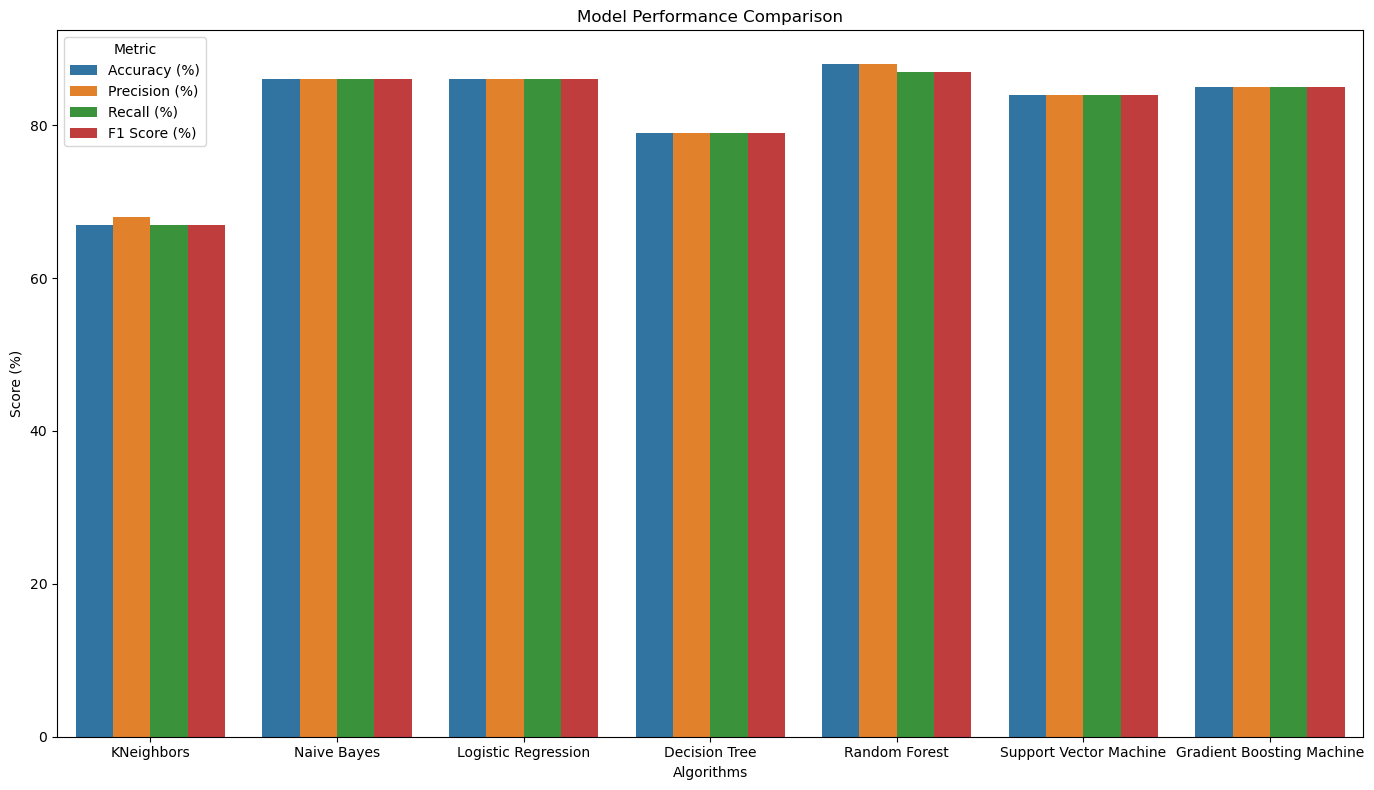

In [123]:
plt.figure(figsize=(14,8))
sns.barplot(data=data1,x='Algorithms',y='Score',hue='Metric')
plt.title('Model Performance Comparison')
plt.xlabel('Algorithms')
plt.ylabel('Score (%)')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

In [124]:
import os
import joblib

# Ensure the models folder exists
os.makedirs("models", exist_ok=True)

# Save all trained models to the 'models/' directory
joblib.dump(knn_model, 'models/knn_model.pkl')
joblib.dump(Nmodel, 'models/naive_bayes_model.pkl')
joblib.dump(lg, 'models/logistic_regression_model.pkl')
joblib.dump(dt, 'models/decision_tree_model.pkl')
joblib.dump(rf, 'models/random_forest_model.pkl')
joblib.dump(classifier, 'models/svm_model.pkl')
joblib.dump(bcm, 'models/bagging_model.pkl')
joblib.dump(gsm4, 'models/gradient_boosting_model.pkl')

print("✅ All models saved successfully to the 'models/' folder.")


✅ All models saved successfully to the 'models/' folder.
